# Chapter 2 Random Variables Part V

#### *Zhuo Jianchao* 

Feb 15, 2020 *Rev 1*

## Mathematical Expectations

Probability function provides full information about a random variable by telling us what possible value it can take and its corresponding probability or probability density around it, but when a random variable hasn't realized, what should we *expect* it to be? 

If we are to use one number to describe multiple numbers we may choose arithmetic mean of those numbers, as for random variable we use expectation, or mean.

### Definition 11 Expectation

The expectation of a random variable $X$ is denoted as $E(X)$ or $\mu_{X}$.

For a discrete random variable $X$ with PMF $f_{X}(x)$, the expectation of $X$ is 
$$E(X)=\sum_{x \in \Omega_{X}}xf_{X}(x)$$

For a continuous random variable $X$ with PDF $f_{X}(x)$, the expectation of $X$ is 
$$E(X)=\int_{-\infty}^{+\infty}xf_{X}(x) \: dx $$

Note that the expectation may not exist as long as the "summation" or "integral" in continuous sense doesn't converge. 

The expectation of a random variable measures the center point of all possible values and their associated probabilities, or the value we can expect from the random variable.

### Intuition of Expectation

The expectation of a random variable tells us where is the balance point of it. To better understand this statement, try to think of a see-saw with graduations marked on it. 
* If there is a 20*kg* at -2, and 20*kg* at 2, we know that if the fulcrum is at 0, the see-saw is balanced.
* If there is a 20*kg* at -2, and 30*kg* at 1, where should the fulcrum be to keep this see-saw's balance? That would be $-2 \times 20 + 1 \times 30 = -10$
* Same idea is applied to multiple weights at multiple places.

Since random variable takes on values in the real line with probability assigned to it, we can take its values as positions and the associated probabilities as weights. Check the definition of expectation of a random variable, we can find this is exactly what we call the balance point of a random variable.

### Properties of Expectation

1. *(Linearity of Expectation)* Expectation is a linear transformation. If $f_1(\cdot)$ and $f_2(\cdot)$ are two measurable mappings of $X$, and two constants $a, b \in (-\infty,+\infty)$, then the expectation of $af_1(X)+bf_2(X)$ is
$$E[af_1(X)+bf_2(X)]=aE(f_1(X))+bE(f_2(X))$$
In particular, $E[f(X)+a)]=E[f(X)]+a$, which means if the see-saw is moved in one direction at a certain distance, the balanced point should move in the same direction at same distance.
2. If there are two random variable $X$ and $Y$, regardless of being independent or not, the expected value of $X \pm Y$ is that 
$$E(X \pm Y)=E(X) \pm E(Y)$$
It indicates that if we are to combine two see-saws of real line, adding(removing) weights of one see-saw to(from ) another at the corresponding graduation, then the new balance of the new see-saw would be the arithmetic plus(minus) of two balances of the original see-saws.

## Variance

Use mean to describe a bounch of numbers is straightforward, but can be not sufficient. For example, $[0,0,0,0]$ has the same mean as that of $[1,2,3,-6]$, what should we expect from it? We know that these two bunches of numbers have the same balance at the real line, but the former are four exactly the same numbers and the latter is relatively more spred out. So is the same for a random variable.

**Variance** of a random variable $X$ measures how spread out the realizations of $X$ is around its mean $E(X)$.

### Definition 12 Variance

The variance of a random variable $X$, denoted as $\sigma_{X}^2$ is defined as
$$\sigma_{X}^2=E(X-\mu_{X})^2$$

For a discrete random variable $X$ with PMF $f_{X}(x)$, 
$$\sigma_{X}^2=E(X-\mu_{X})^2=\sum_{x \in \Omega_{X}}(x-\mu_{X})^2 f_{X}(x)$$

For a continuous random variable $X$ with PDF $f_{X}(x)$, 
$$\sigma_{X}^2=E(X-\mu_{X})^2=\int_{-\infty}^{+\infty}(x-\mu_{X})^2f_{X}(x)\:dx$$

where $\Omega_{X}$ denotes the support of $X$.

The term $X-\mu_{X}$ is called the **deviation from the mean**, it evaluates the distance between $X$'s realization and its mean. We can see that the variance is the **expectation of the squared deviation from the mean**.

---
Note that variance is the expectation of a square, it is not the same magnitude as mean, so we can take squre root of $\sigma_{X}^2$, yielding 
$$\sigma_{X}=\sqrt{\sigma_{X}^2}$$
which is called the **standard deviation** of $X$, which measures on average, what distance is the realizations of random variable away from its mean.

The variance is defined as the expectation of the squared distance between the random variable and its mean, so it's always non-negative, with zero variance indicating perfect concentration of realizations of a random variable, and higher variance meaning further away its realizations from its mean.

In [1]:
using Plots
using Distributions
using StatsPlots

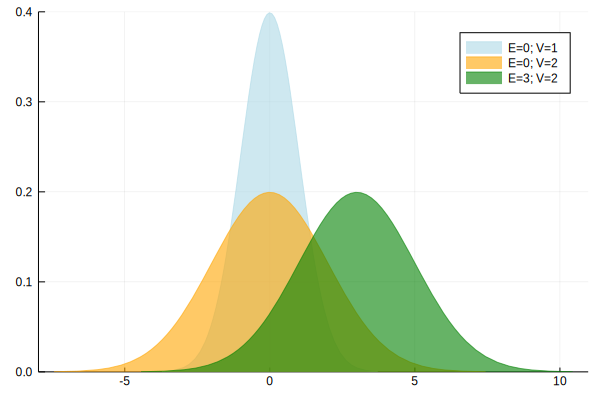

In [2]:
plt = plot(0)
plt1 = plot!(Normal(0,1),
        legend=true, label="E=0; V=1",
        ylim=(0,0.4),
        fill=0, α=0.6,
        color=:lightblue)
plt2 = plot!(Normal(0,2),
        legend=true, label="E=0; V=2",
        ylim=(0,0.4),
        fill=0, α=0.6,
        color=:orange)
plt3 = plot!(Normal(3,2),
        legend=true, label="E=3; V=2",
        ylim=(0,0.4),
        fill=0, α=0.6,
        color=:green)

The graph above draws three normal distributions. 
* The blue one and orange one has the same mean, but the orange one have higehr variance, making it more diverse hence more shorter and fatter. 
* The orange one and the green one have the same variance, but the green one has higer mean, so they are of the same shape, but the green one is like shifting towards right because of the higher mean.

The mean measures the center point of the random varible, whereas the variance measures the degree at which its values are round its mean. 

The mean is a location parameter for the distribution of $X$ because it indicates the balance point all possible outcomes scatter around, and variance of a random variable is a scale parameter for the distribution of $X$ because it indicates the "shape" of the distribution, whether it being tall*(concentrated)* or short*(spred out)*.

## Moments

To gain intuition of the mean and variance of the random variable, we say a mean describes the position of balance of a bunch of numbers, and the variance describes how spred out they are. Do these full characterize a bunch of numbers? Let's take another example, $[1,2,3,-6]$ and $[-1,-2,-3,6]$ have same mean and variance but three of the former four numbers is positive and three of the latter negative.

We can construct a new metrics, say, $d$, such that
$$d=E(X^3)$$
When more weights are added to negative part of the see-saw than to positive part, $d$ is negative and vice versa.

Or another metrics like $c$, such that
$$c=E[(X-\mu_{X})^3]$$
When more weights are added to the part whose values are smaller than mean than those to values bigger than mean, $c$ is negative and vice versa.

By these metrics, we can split the real line at $0$ or at the mean, depending on our inclination, into two parts, and compare density associated with those two parts. The definition of $d$ is the expectation of $X$ to the third power, and the definition of $c$ is the expectation of *deviation from the mean to the third power*.

We can actually by constructing expectation of higher power of the deviation from the mean cultivate new aspect of the distribution of a random variable. That is what we call **moments**.

### Definition 13 *k*-th Moment and *k*-th central Moment

Depending on whether we choose $0$ or mean as benchmark as the central position, and the power to which the expectation of deviation is raised, there are two kinds of moments: *k*-th moment and *k*-th central moment.

The *k*-th moment of random variable $X$ with PMF or PDF $f_{X}(x)$ is

$$
E\left(X^{k}\right)=\left\{\begin{array}{ll}
{\sum_{x \in \Omega_{X}} x^{k} f_{X}(x),} & {\text { if } X \text { is a DRV }} \\
{\int_{-\infty}^{\infty} x^{k} f_{X}(x) d x,} & {\text { if } X \text { is a CRV }}
\end{array}\right.
$$
where $\Omega_{X}$ is the support of $X$.

The *k*-th central moment of random variable $X$ with PMF or PDF $f_{X}(x)$ is

$$
E\left(X-\mu_{X}\right)^{k}=\left\{\begin{array}{ll}
{\sum_{x \in \Omega_{X}}\left(x-\mu_{X}\right)^{k} f_{X}(x),} & {\text { if } X \text { is a DRV, }} \\
{\int_{-\infty}^{\infty}\left(x-\mu_{X}\right)^{k} f_{X}(x) d x,} & {\text { if } X \text { is a CRV. }}
\end{array}\right.
$$

In fact, $E(X)$ is the $1^{st}$ order moment of $X$, and $\sigma_{X}^2$ is the $2^{nd}$ order central moment of $X$. The metrics $d$ and $c$ we defined before are $3^{rd}$ order moment and $3^{rd}$ central moment of $X$ respectively.